In [44]:
import numpy as np
from time import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
def next_permutation(seq, pred=cmp): # RUTINA PARA GENERAR LAS PERMUTACIONES CON REPETICION
    """Like C++ std::next_permutation() but implemented as
    generator. Yields copies of seq."""
    def reverse(seq, start, end):
        # seq = seq[:start] + reversed(seq[start:end]) + \
        #       seq[end:]
        end -= 1
        if end <= start:
            return
        while True:
            seq[start], seq[end] = seq[end], seq[start]
            if start == end or start+1 == end:
                return
            start += 1
            end -= 1
    if not seq:
        raise StopIteration
    try:
        seq[0]
    except TypeError:
        raise TypeError("seq must allow random access.")
    first = 0
    last = len(seq)
    seq = seq[:]
    # Yield input sequence as the STL version is often
    # used inside do {} while.
    yield seq[:]
    if last == 1:
        raise StopIteration
    while True:
        next = last - 1
        while True:
            # Step 1.
            next1 = next
            next -= 1
            if pred(seq[next], seq[next1]) < 0:
                # Step 2.
                mid = last - 1
                while not (pred(seq[next], seq[mid]) < 0):
                    mid -= 1
                seq[next], seq[mid] = seq[mid], seq[next]
                # Step 3.
                reverse(seq, next1, last)
                # Change to yield references to get rid of
                # (at worst) |seq|! copy operations.
                yield seq[:]
                break
            if next == first:
                raise StopIteration
    raise StopIteration

In [12]:
# GENERADOR DE MICROESTADOS RED N=L*L


def Energias(L): # ESTA FUNCION SOLO DEPENDE DEL TAMANO DEL LADO DE LA RED
    Energias=[]
    N=L*L #NUMERO DE SPINES EN RED
    for i in range(0,N+1): # CREA LAS PERMUTACIONES CON REPETICION DE ESTADOS ARRIBA Y ABAJO
        print str(i)+" Espines abajo"
        microestados=list(next_permutation([-1]*i+[1]*(N-i)))
        c=0
        for i in microestados:
            microestados[c]=np.reshape(i,(L,L))
            c+=1
        for micro in microestados:
            Energia=0
            for i in range(L):
                for j in range(L):
                    arriba=i-1
                    abajo=i+1
                    der=j+1
                    izq=j-1
                    if arriba<0:
                        arriba=-1
                    if abajo>L-1:
                        abajo=0
                    if der>L-1:
                        der=0
                    if izq<0:
                        izq=-1
                    Energia=Energia-micro[i][j]*micro[arriba][j]-micro[i][j]*micro[abajo][j]-micro[i][j]*micro[i][der]-micro[i][j]*micro[i][izq]
            Energia=Energia/2 # LA FUNCION ANTERIOR CUENTA DOS VECES CADA INTERACCION
            Energias.append(Energia)
    return Energias

# ESTA FUNCION CALCULA LA DENSIDAD DE ESTADOS
                        
def DensidadEstado(Energias):
    EnergiasSR=[]
    Omega=[]
    for i in Energias: # CUENTA EL NUMERO DE DIFERENTES ENERGIAS
        if i not in EnergiasSR:
            EnergiasSR.append(i)
    for j in EnergiasSR: # CUENTA EL NUMERO DE VECES QUE SE REPITE CADA ENERGIA PARA CALCULAR OMEGA
        c=0
        for k in Energias:
            if k==j:
                c+=1
        Omega.append(c)
    Densidad=[]
    for m in range(len(EnergiasSR)):
        Densidad.append([EnergiasSR[m],Omega[m]])
    return Densidad


0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo


In [18]:
# MALLA 2*2

t0=time()
E22=Energias(2)
Resultado=DensidadEstado(E22)
t1=time()

f = open('Energias22.txt','w')
f.write(str(Resultado))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo


In [92]:
# MALLA 3*3

t0=time()
E33=Energias(3)
Resultado3=DensidadEstado(E33)
t1=time()

f = open('Energias33.txt','w')
f.write(str(Resultado))
f.write("\n"+str(t1-t0))
f.close()


0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo


In [88]:
# MALLA 4*4

t0=time()
E44=Energias(4)
Resultado=DensidadEstado(E44)
t1=time()

f = open('Energias44.txt','w')
f.write(str(Resultado))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo
10 Espines abajo
11 Espines abajo
12 Espines abajo
13 Espines abajo
14 Espines abajo
15 Espines abajo
16 Espines abajo


In [93]:
archivo=open("Energias33.txt","r")
datos=archivo.readlines()
densidad=datos[0]

In [94]:
densidad

'[[-32, 2], [-24, 32], [-20, 64], [-16, 424], [-12, 1728], [-8, 6688], [-4, 13568], [0, 20524], [4, 13568], [8, 6688], [12, 1728], [16, 424], [24, 32], [20, 64], [32, 2]]\n'

In [74]:
Resultado3
def Zeta(Densidad):
    x=np.linspace(0,10,200)
    zeta=[]
    for i in x:
        zet=0
        for j in Densidad:
            zet+=j[1]*np.exp(-1.0*j[0]*i)
        zeta.append(zet)
    return [x,zeta]

def prome_ene(Densidad):
    x=np.linspace(0,10,200)
    e=[]
    for i in x:
        zet=0
        for j in Densidad:
            zet+=j[0]*j[1]*np.exp(-1.0*j[0]*i)
        e.append(zet)
    return [x,e]
def prome_ene2(Densidad):
    x=np.linspace(0,10,200)
    e2=[]
    for i in x:
        zet=0
        for j in Densidad:
            zet+=j[0]*j[0]*j[1]*np.exp(-1.0*j[0]*i)
        e2.append(zet)
    return [x,e2]

In [77]:
a=np.array(prome_ene(Resultado3)[1])
b=np.array(prome_ene2(Resultado3)[1])

cv=b-a*a

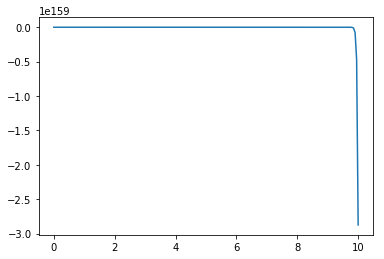

In [78]:
plt.plot(prome_ene(Resultado3)[0],cv)